# programmed by 117CS0233(Bhupati)

In [59]:
import numpy as np, os
import cv2
def LoadData(Dir, Img_Shape):
    Images= []
    Classes=[]
    for(_, Dirs, _) in os.walk(Dir):
        Dirs = sorted(Dirs)
        for SubDir in Dirs:
            SubjectPath = os.path.join(Dir, SubDir)
            for FileName in os.listdir(SubjectPath):
                path = SubjectPath + "/" + FileName
                Img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

                #print Img.shape
                (height, width) = Img.shape

                if(width != Img_Shape[0] or height != Img_Shape[1]):
                    Img = Img.resize((Img_Shape[0], Img_Shape[1]))
                Img=Img.reshape(Img_Shape[0] * Img_Shape[1])
                #print(type(Img))
                Images.append(Img)
                Classes.append(SubDir)
    return np.array(Images),np.array(Classes)

In [60]:
training_dir = 'ATnT/Training'
imageSize = 92*112
imageWidth = 92
imageHeight = 112

X,Class_X= LoadData(training_dir, (imageWidth, imageHeight))


In [61]:
mean=[]
for i in X:
    mean.append(i.mean())
X_mean=np.array(mean)
X_mean
X_zero=[]
for i in range(len(X)):
    X_zero.append(X[i]-X_mean[i])
train_zero=np.array(X_zero)
train_zero

array([[ -80.33821817,  -79.33821817,  -83.33821817, ...,  -81.33821817,
         -82.33821817,  -82.33821817],
       [ -87.98893634,  -87.98893634,  -85.98893634, ..., -115.98893634,
        -113.98893634, -113.98893634],
       [ -93.59549689,  -88.59549689,  -79.59549689, ..., -103.59549689,
        -106.59549689, -103.59549689],
       ...,
       [  -0.15130047,   -4.15130047,   -2.15130047, ...,  -21.15130047,
         -25.15130047,  -28.15130047],
       [  -3.77950311,   -4.77950311,   -2.77950311, ...,  -19.77950311,
         -25.77950311,  -23.77950311],
       [  -1.60461957,   -2.60461957,   -3.60461957, ...,  -27.60461957,
         -27.60461957,  -25.60461957]])

In [62]:
cov=np.cov(X_zero)
cov.shape

(240, 240)

In [63]:
#Calculate Eigen-Values and Eigen-Vectors
w,v = np.linalg.eig(cov)
#Eigen Vectors
v.shape

(240, 240)

In [64]:
#Descending Sorting
eigen_values= np.ndarray.copy(w)
id(eigen_values)
indexes=[i for i in range(400)]
for i in range(len(w)-1):
    max_idx = i; 
    for j in range(i+1,len(w)):
        if(w[j]>w[max_idx]):
            max_idx = j;
    
    indexes[i],indexes[max_idx]=indexes[max_idx],indexes[i]
    w[i],w[max_idx]=w[max_idx],w[i]
    
w

array([2.32571962e+05, 5.89757035e+04, 2.52853495e+04, 2.25835399e+04,
       1.41978897e+04, 1.19344121e+04, 9.99440964e+03, 8.91544180e+03,
       7.14760115e+03, 6.53772046e+03, 5.38850131e+03, 4.82904247e+03,
       4.56511003e+03, 3.94969822e+03, 3.86906029e+03, 3.72334681e+03,
       3.64843108e+03, 3.21056590e+03, 3.04837039e+03, 2.81878850e+03,
       2.71282171e+03, 2.40380343e+03, 2.32637045e+03, 2.20640673e+03,
       2.09013899e+03, 2.02790275e+03, 1.98761012e+03, 1.90952615e+03,
       1.87629413e+03, 1.75978392e+03, 1.71437621e+03, 1.65957570e+03,
       1.61933704e+03, 1.57215292e+03, 1.50395685e+03, 1.45046760e+03,
       1.42580844e+03, 1.34036253e+03, 1.31579580e+03, 1.28051276e+03,
       1.22175696e+03, 1.19386432e+03, 1.17033583e+03, 1.14621261e+03,
       1.09619917e+03, 1.06780398e+03, 1.00363935e+03, 9.73639809e+02,
       9.66510333e+02, 9.52727663e+02, 9.20333273e+02, 9.16203231e+02,
       8.98768620e+02, 8.82741875e+02, 8.39913104e+02, 8.34981168e+02,
      

In [65]:
w[-5:].astype(int)

array([68, 64, 59, 53, 49])

In [66]:
min(eigen_values),w[-1]

(49.952529153959745, 49.952529153959745)

# Testing Preprocessing

In [67]:
testing_dir = 'ATnT/Testing'

X,Class_Y= LoadData(testing_dir, (imageWidth, imageHeight))

X_zero=[]
for i in range(len(X)):
    X_zero.append(X[i]-X_mean[i])
X_zero=np.array(X_zero)
X_zero

array([[ -94.33821817,  -94.33821817,  -95.33821817, ...,  -91.33821817,
         -88.33821817,  -95.33821817],
       [-106.98893634, -100.98893634, -100.98893634, ..., -112.98893634,
        -110.98893634, -109.98893634],
       [ -88.59549689,  -89.59549689, -100.59549689, ...,  -89.59549689,
         -89.59549689,  -95.59549689],
       ...,
       [  23.3289014 ,   20.3289014 ,   27.3289014 , ...,    4.3289014 ,
          -0.6710986 ,    3.3289014 ],
       [  22.05221273,   25.05221273,   23.05221273, ...,   -0.94778727,
          -2.94778727,    3.05221273],
       [  21.06667314,   23.06667314,   24.06667314, ...,    3.06667314,
          -1.93332686,    1.06667314]])

# k - Principal Components

In [68]:
def min_index(arr):
    index=0
    for i in range(1,len(arr)):
        if(arr[index] > arr[i]):
            index=i
    return index

In [69]:

def principal_component_faces(K):
    #Generating feature vector
    feature_vector = v[indexes[:K]]

    eigen_faces=np.matmul(feature_vector , train_zero)

    signature=[]
    trans=np.matrix.transpose(train_zero)
    for i in range(len(trans[0])):
        signature.append(np.matmul(eigen_faces , trans[:,i]))
    signature = np.array(signature)

    ##TESTING
    proj_test_face=[]
    for i in range(len(X_zero)):
        proj_test_face.append(np.matmul(eigen_faces , X_zero[i]))
    proj_test_face
    proj_test_face=np.array(proj_test_face)

    dist=[]
    index_min=[]
    for i in range(len(proj_test_face)):
        d=[]
        for j in range(len(signature)):
            d.append(np.linalg.norm(signature[j] -proj_test_face[i]))
        dist.append(d)
        index_min.append(min_index(d))

    dist=np.array(dist)

    count=0
    for i in range(len(index_min)):
        if(Class_X[index_min[i]] ==Class_Y[i]):
            count+=1
    return count/len(index_min)

In [70]:
principal_component_faces(50)

0.825

In [71]:
acc=[]
for i in range(len(w)):
    acc.append(principal_component_faces(i))
arr

[0.025,
 0.0625,
 0.125,
 0.40625,
 0.41875,
 0.525,
 0.575,
 0.58125,
 0.5625,
 0.6,
 0.625,
 0.675,
 0.675,
 0.725,
 0.73125,
 0.73125,
 0.74375,
 0.7625,
 0.7625,
 0.78125,
 0.79375,
 0.80625,
 0.8125,
 0.81875,
 0.825,
 0.83125,
 0.83125,
 0.8375,
 0.8375,
 0.825,
 0.83125,
 0.83125,
 0.84375,
 0.8125,
 0.8125,
 0.8125,
 0.81875,
 0.83125,
 0.83125,
 0.825,
 0.83125,
 0.81875,
 0.83125,
 0.825,
 0.81875,
 0.81875,
 0.83125,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.79375,
 0.80625,
 0.8,
 0.8,
 0.8,
 0.8,
 0.80625,
 0.80625,
 0.7875,
 0.79375,
 0.79375,
 0.79375,
 0.80625,
 0.8,
 0.8,
 0.79375,
 0.79375,
 0.79375,
 0.79375,
 0.79375,
 0.8,
 0.8,
 0.8,
 0.80625,
 0.8,
 0.80625,
 0.8125,
 0.80625,
 0.80625,
 0.80625,
 0.80625,
 0.79375,
 0.80625,
 0.8,
 0.79375,
 0.8,
 0.79375,
 0.80625,
 0.8,
 0.8125,
 0.80625,
 0.8125,
 0.80625,
 0.8125,
 0.8125,
 0.8125,
 0.81875,
 0.81875,
 0.8125,
 0.8125,
 0.8125,
 0

In [72]:
max(acc)

0.84375

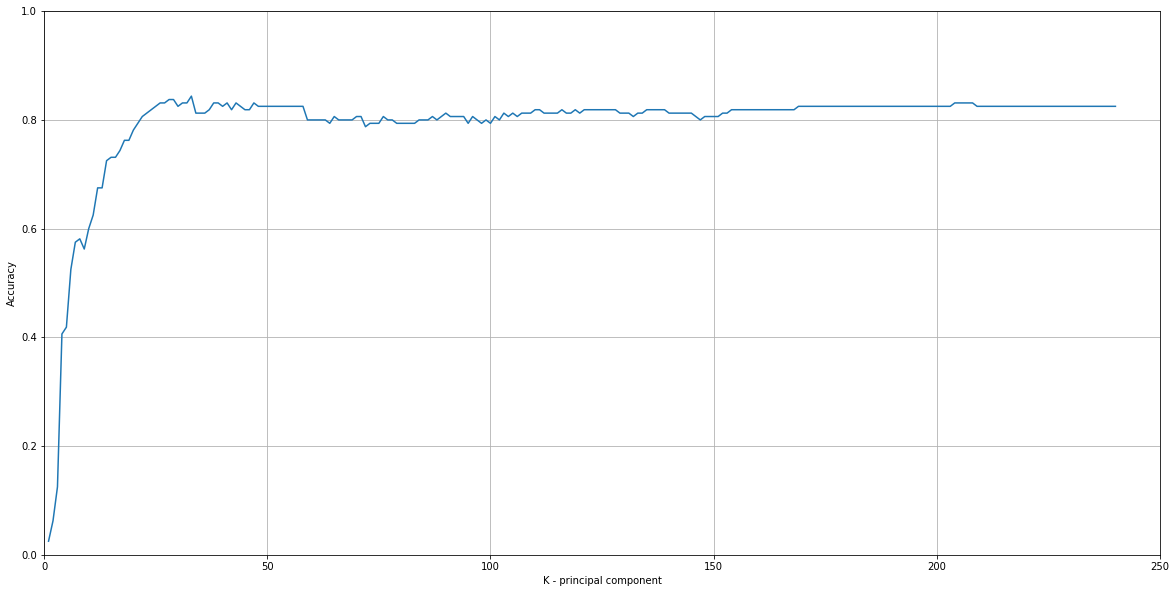

In [73]:
import matplotlib.pyplot as plt
x = [i for i in range(1,len(w)+1)]
plt.figure(figsize=(20,10))
plt.plot(x,acc)
plt.axis([0, 250, 0, 1])
plt.ylabel('Accuracy')
plt.xlabel('K - principal component')
plt.grid(True)
plt.show()